# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

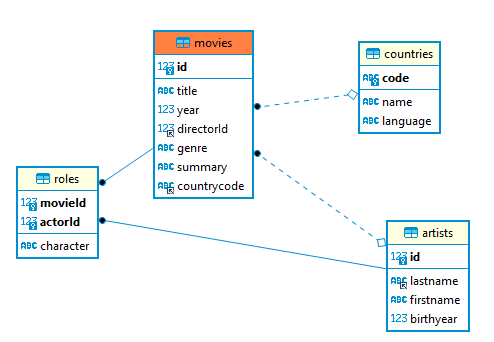

In [1]:
from IPython.display import Image
Image("Images/ER_Diagram.png")

Nous disposons de 4 tables: 
1) movies: 
- contenant l'id =identifiant des films, leur titre, l'année de production, l'identifiant du réalisateur, le genre, le résumé et la nationnalité du film.

- id:integer définit comme Primary Key
- title:varchar
- year:integer
- directorID: integer définit comme foreign key (table ref artists id)
- genre: varchar
- summary:Text
- countrycode:Varchar définit comme foreign key (table ref countries code)

2) roles: 
- l'identifiant Id des films, l'id des acteurs qui ont joués dans les films et le nom des personnages joué.

- movieId:integer définit comme Primary Key et aussi Foreign Key (table ref movies id)
- actorId:integer définit comme Primary Key et aussi Foreign Key (table ref artists id)
- character:varchar

3) artists: 
- l'id des acteurs, leur nom et prénom ainsi que l'année de naissance. 

- id:integer définit comme Primary Key (ref à la colonne actorId de la table roles et directorId table movies)
- lastname:varchar
- firstname:varchar
- birthyear:integer

4) countries: 
- code pays associé au nom du pays et la langue parlée.

- code:varchar définit comme Primary Key (ref à la colonne countrycode de la table movies)
- name:varchar
- language:varchar



---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -m pip install --upgrade pip

In [6]:
pip install sqlalchemy

In [7]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sqlalchemy import create_engine
import pymysql

In [9]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [10]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [11]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [12]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [13]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [14]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [15]:
results.shape

(118, 4)

In [16]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [17]:
sql_query_01 = """
    SELECT *
    FROM movies
    WHERE genre='Drame' 
"""

results1 = pd.read_sql_query(sql_query_01, engine)
results1.head(5)

,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK


In [18]:
len(results1) # 83 films

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [19]:
sql_query_02 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre,movies.year as Annee
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId
    INNER JOIN movies ON movies.id=roles.movieId
    WHERE lastname='Willis' and firstname="Bruce"
    ORDER BY year
"""

results2 = pd.read_sql_query(sql_query_02, engine)
results2.head(10)

,Nom,Prenom,Personnage,Titre,Annee
0,Willis,Bruce,John McClane,Piège de cristal,1988
1,Willis,Bruce,John McClane,58 minutes pour vivre,1990
2,Willis,Bruce,Butch Coolidge,Pulp Fiction,1994
3,Willis,Bruce,John McClane,Une Journée en enfer,1995
4,Willis,Bruce,John McClane,Die Hard 4 : Retour en enfer,2007


In [20]:
len(results2)

5

Q03: Qui est le réalisateur de Memento ?

In [21]:
sql_query_03 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, movies.title as Titre
    FROM  movies
    INNER JOIN artists ON artists.id=movies.directorId
    WHERE title='Memento'
"""

results3 = pd.read_sql_query(sql_query_03, engine)
results3.head(10)

,Nom,Prenom,Titre
0,Nolan,Christopher,Memento


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [22]:
sql_query_04 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre,movies.year as Annee
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId
    INNER JOIN movies ON movies.id=roles.movieId
    Where roles.character='Chewbacca'
    
"""
results4 = pd.read_sql_query(sql_query_04, engine)
results4.head(10)

,Nom,Prenom,Personnage,Titre,Annee
0,Mayhew,Peter,Chewbacca,La Guerre des étoiles,1977
1,Mayhew,Peter,Chewbacca,L'Empire contre-attaque,1980
2,Mayhew,Peter,Chewbacca,Le Retour du Jedi,1983
3,Mayhew,Peter,Chewbacca,Star Wars : Le Réveil de la Force,2015
4,Suotamo,Joonas,Chewbacca,Star Wars : Les Derniers Jedi,2017


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [23]:
sql_query_05 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre,movies.year as Annee
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId
    INNER JOIN movies ON movies.id=roles.movieId
    WHERE lastname='Willis' AND roles.character='John McClane'
    ORDER BY year
"""

results5 = pd.read_sql_query(sql_query_05, engine)
results5.head(10)

,Nom,Prenom,Personnage,Titre,Annee
0,Willis,Bruce,John McClane,Piège de cristal,1988
1,Willis,Bruce,John McClane,58 minutes pour vivre,1990
2,Willis,Bruce,John McClane,Une Journée en enfer,1995
3,Willis,Bruce,John McClane,Die Hard 4 : Retour en enfer,2007


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [24]:
sql_query_06 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId
    INNER JOIN movies ON movies.id=roles.movieId
    WHERE title='Sueurs froides'
    
"""

results6 = pd.read_sql_query(sql_query_06, engine)
results6.head(10)

,Nom,Prenom,Personnage,Titre
0,Stewart,James,Det. John 'Scottie' Ferguson,Sueurs froides
1,Novak,Kim,Madeleine Elster / Judy Barton,Sueurs froides
2,Bel Geddes,Barbara,Marjorie 'Midge' Wood,Sueurs froides


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [25]:
sql_query_07 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId 
    INNER JOIN movies ON movies.id=roles.movieId OR movies.directorId=artists.id and artists.lastname="Burton"
    WHERE artists.lastname='Depp' 
    
    
"""

results7 = pd.read_sql_query(sql_query_07, engine)
results7.head(10)

,Nom,Prenom,Personnage,Titre
0,Depp,Johnny,Ichabod Crane,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [26]:
sql_query_08 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Personnage, movies.title as Titre
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId 
    INNER JOIN movies ON  movies.directorId=artists.id AND movies.id=roles.movieId 
    Where lastname="Allen" and firstname="Woody"  
"""

results8 = pd.read_sql_query(sql_query_08, engine)
results8.head(20)

,Nom,Prenom,Personnage,Titre
0,Allen,Woody,Sid Waterman,Scoop
1,Allen,Woody,Isaac Davis,Manhattan
2,Allen,Woody,Alvy Singer,Annie Hall
3,Allen,Woody,Prof. Gabriel 'Gabe' Roth,Maris et femmes


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [27]:
sql_query_09 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Presonnage, movies.title as Titre
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId 
    INNER JOIN movies ON  movies.directorId=artists.id AND movies.id=roles.movieId 
    Where artists.id=roles.actorId and movies.directorId=artists.id 
"""

results9 = pd.read_sql_query(sql_query_09, engine)
results9.head(19)

,Nom,Prenom,Presonnage,Titre
0,Eastwood,Clint,Bill Munny,Impitoyable
1,Tarantino,Quentin,Mr. Brown,Reservoir Dogs
2,Allen,Woody,Sid Waterman,Scoop
3,Tarantino,Quentin,Jimmie Dimmick,Pulp Fiction
4,Allen,Woody,Isaac Davis,Manhattan
5,Allen,Woody,Alvy Singer,Annie Hall
6,Kelly,Gene,Don Lockwood,Chantons sous la pluie
7,Chaplin,Charlie,"Adenoid Hynkel, Dictator of Tomania / A Jewish...",Le dictateur
8,Polanski,Roman,"Alfred, Assistent des Professors",Le Bal des vampires
9,Chaplin,Charlie,A factory worker,Les temps modernes


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [28]:
sql_query_10 = """
SELECT  artists.lastname as Nom, artists.firstname as Prenom,movies.title as Titre
FROM movies 
INNER JOIN artists ON artists.id=movies.directorId 
where artists.lastname="Tarantino" and movies.directorId NOT IN 
(SELECT roles.actorId 
From roles 
Where movies.id=roles.movieId)
""" 

results10 = pd.read_sql_query(sql_query_10, engine)
results10.head(19)

,Nom,Prenom,Titre
0,Tarantino,Quentin,Kill Bill : Volume 1
1,Tarantino,Quentin,Jackie Brown
2,Tarantino,Quentin,Kill Bill : Volume 2
3,Tarantino,Quentin,Inglourious Basterds
4,Tarantino,Quentin,Django Unchained


Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [29]:
sql_query_11 = """
    SELECT movies.title as Titre, roles.character as Personnage, artists.lastname as Nom, artists.firstname as Prenom
    FROM movies 
    INNER JOIN roles ON  movies.directorId=roles.actorId
    INNER JOIN artists ON roles.actorId=artists.id     
     
"""

results11 = pd.read_sql_query(sql_query_11, engine)
results11.head(10)

,Titre,Personnage,Nom,Prenom
0,Kill Bill : Volume 1,Mr. Brown,Tarantino,Quentin
1,Kill Bill : Volume 1,Jimmie Dimmick,Tarantino,Quentin
2,Impitoyable,Bill Munny,Eastwood,Clint
3,Impitoyable,Blondie,Eastwood,Clint
4,Match point,Sid Waterman,Allen,Woody
5,Match point,Isaac Davis,Allen,Woody
6,Match point,Alvy Singer,Allen,Woody
7,Match point,Prof. Gabriel 'Gabe' Roth,Allen,Woody
8,Les Quatre Cents Coups,Claude Lacombe,Truffaut,François
9,Lost in Translation,Mary Corleone,Coppola,Sofia


Q12: Quels sont les films de Hitchcock sans James Stewart

In [30]:
sql_query_12 ="""
SELECT artists.lastname as Nom, artists.firstname as Prenom,movies.title as Titre
FROM movies 
INNER JOIN artists ON artists.id=movies.directorId and artists.lastname="Hitchcock"
where movies.id NOT IN (SELECT roles.movieId 
From roles 
INNER JOIN artists ON roles.actorId=artists.id
Where artists.lastname="Stewart" and artists.firstname="James")
    
"""
results12 = pd.read_sql_query(sql_query_12, engine)
results12.head(19)  

,Nom,Prenom,Titre
0,Hitchcock,Alfred,La Mort aux trousses
1,Hitchcock,Alfred,Rebecca
2,Hitchcock,Alfred,Les Enchaînés
3,Hitchcock,Alfred,Psychose
4,Hitchcock,Alfred,Les Oiseaux
5,Hitchcock,Alfred,L'Inconnu du Nord-Express
6,Hitchcock,Alfred,Soupçons


Q13: Quel est la filmographie de James Stewart ?

In [31]:
sql_query_13 = """
    SELECT artists.lastname as Nom, artists.firstname as Prenom, roles.character as Nom_Personnage, movies.title as Titre, movies.year as Annee_de_Production
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId
    INNER JOIN movies ON movies.id=roles.movieId
    Where artists.lastname="Stewart"
    
"""
results13 = pd.read_sql_query(sql_query_13, engine)
results13.head(19)  

,Nom,Prenom,Nom_Personnage,Titre,Annee_de_Production
0,Stewart,James,Det. John 'Scottie' Ferguson,Sueurs froides,1958
1,Stewart,James,L.B. Jefferies,Fenêtre sur cour,1954
2,Stewart,James,Dr. Ben McKenna,L'homme qui en savait trop,1956


Q14: Quels sont les films sans rôle (acteurs) ?

Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [32]:
sql_query_16 = """
Select movies.directorId as id_Realisateur, count(distinct movies.id) as nombre_de_film, artists.firstname as Prenom, artists.lastname as Nom
From movies, artists
Where movies.directorId=artists.id
Group by directorId 
Order by count(distinct id) desc
limit 10     
    
"""
results16 = pd.read_sql_query(sql_query_16, engine)
results16.head(19) 

,id_Realisateur,nombre_de_film,Prenom,Nom
0,488,13,Steven,Spielberg
1,2636,10,Alfred,Hitchcock
2,1243,8,Woody,Allen
3,138,7,Quentin,Tarantino
4,240,7,Stanley,Kubrick
5,525,6,Christopher,Nolan
6,1776,6,Francis,Ford Coppola
7,578,6,Ridley,Scott
8,3556,6,Roman,Polanski
9,1,5,George,Lucas


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [33]:
sql_query_17 = """
Select movies.directorId as Realisateur, count(distinct movies.id) as nombre_de_film, artists.firstname as Prenom, artists.lastname as Nom
From movies, artists
Where movies.directorId=artists.id 
Group by directorId 
Having count(*)>=2  
    
"""
results17 = pd.read_sql_query(sql_query_17, engine)
results17.head(10) 

,Realisateur,nombre_de_film,Prenom,Nom
0,1,5,George,Lucas
1,42,2,Lars,von Trier
2,138,7,Quentin,Tarantino
3,201,2,Michel,Gondry
4,223,2,Alejandro,González Iñárritu
5,224,4,David,Cronenberg
6,240,7,Stanley,Kubrick
7,488,13,Steven,Spielberg
8,525,6,Christopher,Nolan
9,578,6,Ridley,Scott


In [34]:
len(results17) #Ils sont 46 réalisateurs

46

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

Q19: Quels sont les 10 pays produisant le plus de films ?

In [35]:
sql_query_19 = """
Select movies.countrycode as code_Pays, count(distinct movies.id) as nombre_de_film, countries.name as pays
From movies, countries
Where movies.countrycode=countries.code
Group by countrycode 
Order by count(distinct id) desc
limit 10
"""
 
results19 = pd.read_sql_query(sql_query_19, engine)
results19  

,code_Pays,nombre_de_film,pays
0,US,131,Etats-Unis
1,FR,39,France
2,GB,21,Royaume-Uni
3,CA,6,Canada
4,DE,5,Allemagne
5,IT,5,Italie
6,JP,4,Japan
7,AU,3,Australia
8,SE,3,Suède
9,BE,2,Belgium


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [36]:
sql_query_20 = """
SELECT actorId as id, lastname as Nom, firstname as prenom, COUNT(actorId) nombre_de_film_joué, countrycode as Pays
FROM roles, artists, movies
WHERE roles.actorId = artists.id
AND roles.movieId = movies.id
AND countrycode = "FR"
GROUP BY actorId
ORDER BY COUNT(actorId) DESC
LIMIT 5
"""
results20 = pd.read_sql_query(sql_query_20, engine)
results20  

,id,Nom,prenom,nombre_de_film_joué,Pays
0,50,Deneuve,Catherine,3,FR
1,3829,Belmondo,Jean-Paul,3,FR
2,3784,Piccoli,Michel,3,FR
3,11546,Fresnay,Pierre,2,FR
4,17498,Arestrup,Niels,2,FR


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)